<a href="https://colab.research.google.com/github/Slzl/Linear-regression/blob/main/Bike_Dataset_Nicky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload=files.upload()

Saving bike_dataset[1].csv to bike_dataset[1].csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
import io

In [ ]:
adv=pd.read_csv(io.BytesIO(upload['bike_dataset[1].csv']))
print(adv)

                      model_name    price      CC  mileage   type_of_bike  \
0          Gravton Motors Quanta    99000     NaN    320.0  Electric Bike   
1              Simple Energy One   109999     NaN    236.0  Electric Bike   
2                  Okaya Classiq    69900     NaN    200.0  Electric Bike   
3             Oben Electric Rorr   102999     NaN    200.0  Electric Bike   
4                Ola Electric S1    85099     NaN    181.0  Electric Bike   
..                           ...      ...     ...      ...            ...   
356                 Aprilia RSV4  2369000  1099.0     12.0    Petrol Bike   
357  Harley-Davidson Sportster S  1551000  1252.0     11.8    Petrol Bike   
358              Suzuki Hayabusa  1640000  1340.0     11.0    Petrol Bike   
359       Ducati Hypermotard 950  1402278   937.0      9.0    Petrol Bike   
360  Harley-Davidson CVO Limited  4999000  1923.0      8.0    Petrol Bike   

     weight_in_kg                                              links  \
0  

In [ ]:
adv.head()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,NaN,320.0,Electric Bike,100,https://www.carandbike.com/gravton-motors-bike...,4.2,70.0
1,Simple Energy One,109999,NaN,236.0,Electric Bike,110,https://www.carandbike.com/simple-energy-bikes...,3.6,100.0
2,Okaya Classiq,69900,NaN,200.0,Electric Bike,95,https://www.carandbike.com/okaya-bikes/classiq,NaN,25.0
3,Oben Electric Rorr,102999,NaN,200.0,Electric Bike,120,https://www.carandbike.com/oben-electric-bikes...,3.0,100.0
4,Ola Electric S1,85099,NaN,181.0,Electric Bike,121,https://www.carandbike.com/ola-electric-bikes/s1,2.9,116.0


In [ ]:
adv.shape

(361, 9)

In [ ]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model_name          361 non-null    object 
 1   price               361 non-null    int64  
 2   CC                  304 non-null    float64
 3   mileage             361 non-null    float64
 4   type_of_bike        361 non-null    object 
 5   weight_in_kg        361 non-null    int64  
 6   links               361 non-null    object 
 7   acceleration_speed  170 non-null    float64
 8   top_speed           200 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 25.5+ KB


In [ ]:
adv.describe()

,price,CC,mileage,weight_in_kg,acceleration_speed,top_speed
count,3.610000e+02,304.000000,361.000000,361.000000,170.000000,200.000000
mean,8.399079e+05,680.973684,44.681413,178.839335,4.193412,99.338650
std,1.052083e+06,547.744364,39.890270,73.839516,2.369334,39.631992
min,3.800000e+04,87.800000,8.000000,55.000000,1.010000,25.000000
25%,1.000000e+05,164.425000,20.000000,118.000000,2.800000,79.500000
50%,2.420000e+05,618.000000,30.000000,169.000000,3.215000,100.000000
75%,1.459000e+06,1051.500000,55.000000,216.000000,5.075000,129.115000
max,7.990000e+06,2458.000000,320.000000,433.000000,13.800000,200.000000


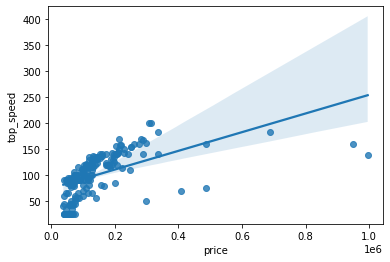

In [ ]:
sns.regplot(x='price', y='top_speed', data=adv)

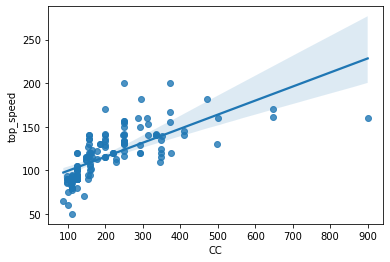

In [ ]:
sns.regplot(x='CC', y='top_speed', data=adv)

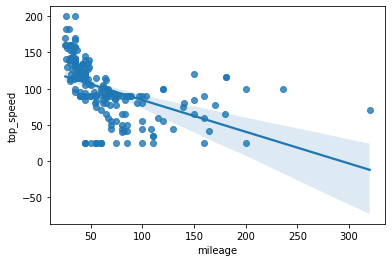

In [ ]:
sns.regplot(x='mileage', y='top_speed', data=adv)

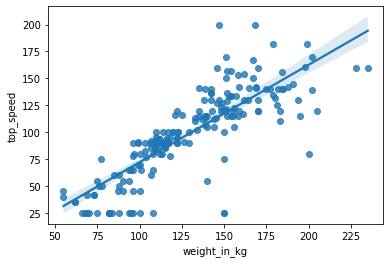

In [ ]:
sns.regplot(x='weight_in_kg', y='top_speed', data=adv)

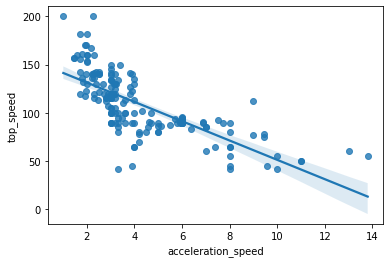

In [ ]:
sns.regplot(x='acceleration_speed', y='top_speed', data=adv)

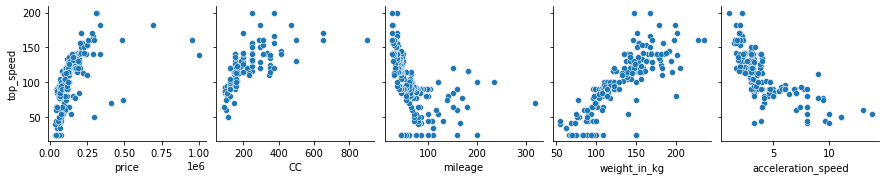

In [49]:
sns.pairplot(data=adv, x_vars=['price', 'CC', 'mileage','weight_in_kg','acceleration_speed'], y_vars='top_speed')

In [ ]:
adv.corr()

,price,CC,mileage,weight_in_kg,acceleration_speed,top_speed
price,1.000000,0.811393,-0.481968,0.771784,-0.410462,0.555560
CC,0.811393,1.000000,-0.728447,0.916298,-0.479128,0.697374
mileage,-0.481968,-0.728447,1.000000,-0.582938,0.269118,-0.476656
weight_in_kg,0.771784,0.916298,-0.582938,1.000000,-0.654655,0.817970
acceleration_speed,-0.410462,-0.479128,0.269118,-0.654655,1.000000,-0.736749
top_speed,0.555560,0.697374,-0.476656,0.817970,-0.736749,1.000000


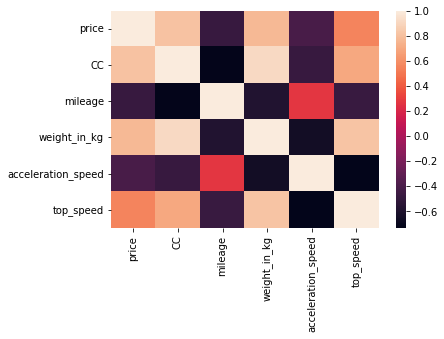

In [ ]:
sns.heatmap(adv.corr())

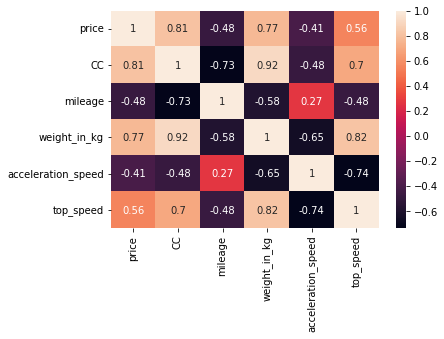

In [ ]:
sns.heatmap(adv.corr(), annot=True)

In [74]:
X=adv['mileage']
y=adv['weight_in_kg']

In [75]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.70, random_state=100)

In [76]:
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,mileage
281,1.0,18.0
125,1.0,45.0
54,1.0,74.0
191,1.0,28.6
65,1.0,67.0


In [77]:
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const      232.751807
mileage     -1.196055
dtype: float64

In [78]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           weight_in_kg   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     127.1
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           4.23e-24
Time:                        16:45:33   Log-Likelihood:                -1404.6
No. Observations:                 252   AIC:                             2813.
Df Residuals:                     250   BIC:                             2820.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        232.7518      6.119     38.037      0.000     220.700     244.803
mileage       -1.1961      0.106    -11.272      0.000      -1.405      -0.987
==============================================================================
Omnibus:                       63.505   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.818
Skew:                           1.356   Prob(JB):                     5.24e-25
Kurtosis:                       4.815   Cond. No.                         87.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

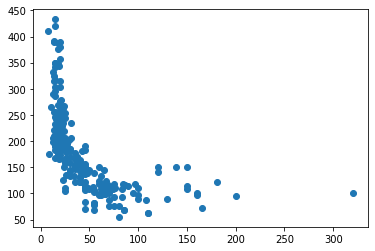

In [79]:
plt.scatter(X_train, y_train)

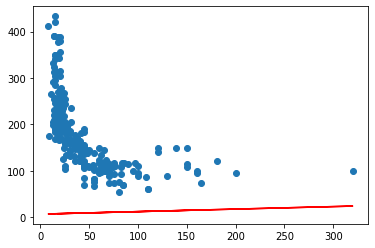

In [80]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948+0.054*X_train,'r')
plt.show()

In [81]:
y_train_pred=lr_model.predict(X_train_sm)
y_train_pred

281    211.222820
125    178.929340
54     144.243750
191    198.544639
65     152.616134
          ...    
79     158.596408
343    216.007040
323    214.810985
280    211.222820
8       35.402762
Length: 252, dtype: float64

In [82]:
residual=y_train-y_train_pred
residual

281     4.777180
125   -30.929340
54    -35.243750
191     3.455361
65    -29.616134
         ...    
79    -24.596408
343     4.992960
323    -3.810985
280   -25.222820
8      37.597238
Length: 252, dtype: float64

Text(0.5, 1.0, 'Residual Plot')

<Figure size 432x288 with 0 Axes>

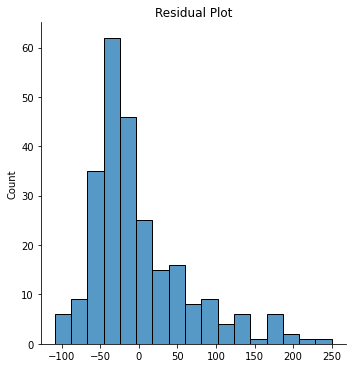

In [83]:
plt.figure()
sns.displot(residual)
plt.title("Residual Plot")

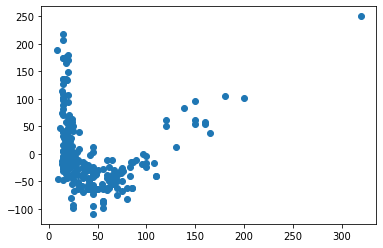

In [84]:
plt.scatter(X_train, residual)
plt.show()